# Project Objective :

This project aims to leverage customer personality analysis to achieve the following business objectives:

### 
Improve Customer Segmentatio
: By identifying distinct customer personalities within our existing customer base, we can create more targeted and effective customer segments. This will allow us to better understand the needs, preferences, and behaviors of each segmen
.### 

Enhance Marketing Campai
ns: By tailoring marketing messages and channels to resonate with specific customer personalities, we can increase campaign effectiveness and improve return on investment (R
I### ).

Optimize Product Develo
ment: By understanding the characteristics of our ideal customer for different product lines, we can focus product development efforts on features and functionalities that cater to their specific needs and de
i### res.

Personalize Customer Exp
rience: By incorporating customer personality insights across touchpoints, we can personalize the customer experience, fostering stronger customer relationships and increasing satis
a### ction.

This project's success will be mes- ured by:

Increased accuracy of customer segmentat- ion models.
Improved click-through rates and conversion rates for marketin- g campaigns.
Enhanced customer satisfa- ction scores.
Growth in sales within targeted customer segments.ustomer segments.

### Attributes

People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year 
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
- MntWines: Amount spent on wine in last 2 years 
- MntFruits : Amount spent on fruits in last 2 years
- MntMeatProducts : Amount spent on meat in last 2 years
- MntFishProducts : Amount spent on fish in last 2 years
- MntSweetProducts : Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# loading data
df = pd.read_excel(r'marketing_campaign1.xlsx')

In [3]:
# backup original data
data = df.copy()

# Data Exploration

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.shape

(2240, 29)

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [7]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [8]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2227,4201,1962,Graduation,Single,57967.0,0,1,2013-03-03,39,229,7,137,4,0,91,5,4,2,8,5,0,0,0,0,0,0,3,11,0
708,3336,1948,PhD,Together,66375.0,0,1,2013-11-21,96,712,0,45,0,0,191,3,2,4,5,7,1,0,0,0,0,0,3,11,0
1040,3717,1959,Graduation,Married,61180.0,0,1,2014-04-23,70,403,24,29,6,24,218,2,5,5,6,3,1,0,0,0,0,0,3,11,0
1988,898,1986,Graduation,Married,23477.0,1,0,2013-10-21,39,38,15,54,3,8,29,3,3,0,4,8,0,0,0,0,0,0,3,11,0
758,10470,1979,Master,Married,40662.0,1,0,2013-03-15,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0,3,11,0


## Quick Data Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

- Income feature has some missing values.

## Statistical Summary

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


- Year_Birth has min value is 1893 which is quite low.
- Income has min value of 1730 is a very low annual income while 6,66,666 as the max value.
- Dt_Customer reveals that we have data from 30th July 2012 to 29th June 2014.

In [11]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- Marital_Status has 8 unique values which is quite unusual.

> # Key Insights

- We observed missing values in the Income feature.
- The earliest birth year in the data is 1893, which is quite early. It's advisable to examine these records.
- The income values range widely, with the minimum being 1730 (potentially indicating very low income) and the maximum reaching 666666.
- Dt_Customer feature indicates a data collection timeframe from July 30th, 2012, to June 29th, 2014.
- The Marital_Status feature has a surprisingly high number of unique categories (8). It might be helpful to review these categories and consider potential consolidation or recoding..

# Data Cleaning

### Identifying Duplicates
Check for duplicates and remove them if necessary.

In [12]:
df.duplicated().sum()

0

- There are no duplicate rows present in the DataFrame.

### Identifying Missing Values

In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

- There are 24 missing values in the 'Income' column, and zero missing values in all other columns.

In [14]:
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [15]:
# Calculate mean income for each education level (explored but not directly used)

df.groupby('Education')['Income'].mean()

Education
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [16]:
# Create a new DataFrame 'df_missing' containing only the rows where the 'Income' column has missing values (NaN).

df_missing = df[df['Income'].isnull()]

In [17]:
# Recalculate mean income by education for imputation

income_by_education = df.groupby('Education')['Income'].mean()

In [18]:
# Fill missing 'Income' values using group-based imputation

df['Income'] = data.apply(lambda row: income_by_education[row['Education']] if pd.isna(row['Income']) else row['Income'], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [20]:
# Get features with unique values less than 10
features_less_than_10_unique_values = [feature for feature in df.columns if df[feature].nunique() < 10]
features_less_than_10_unique_values

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

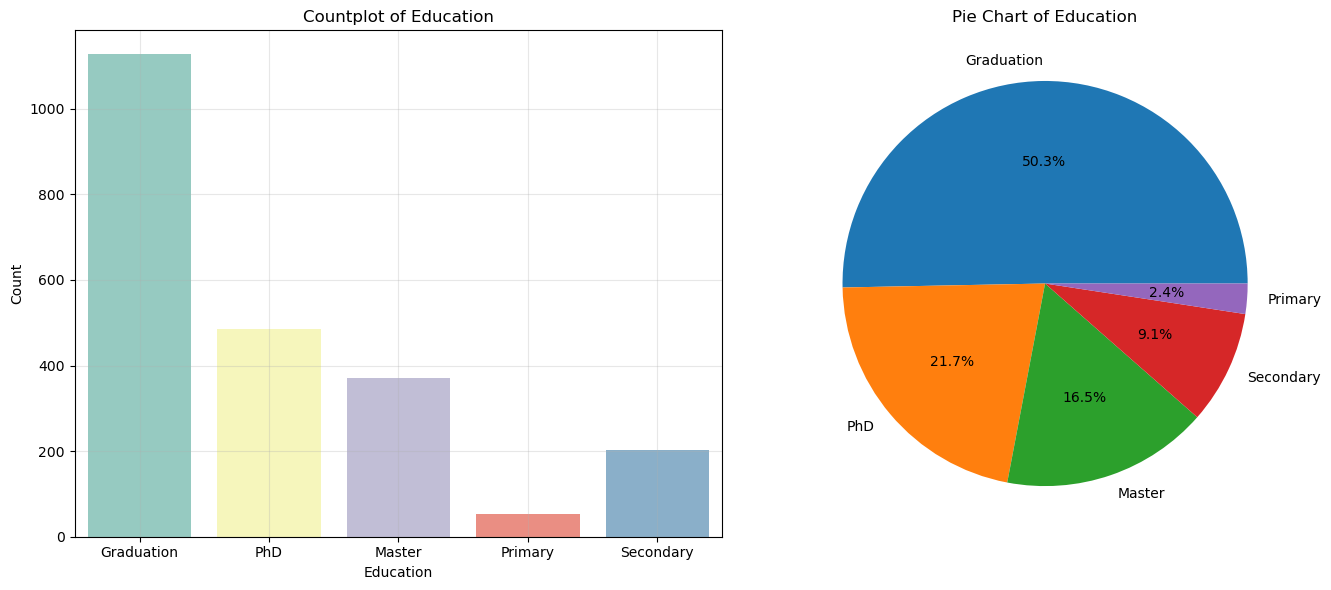

In [44]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Education", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Create pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Education')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [27]:
## Rename education values for better understanding
df['Education'] = df['Education'].replace({'Basic': 'Primary', '2n Cycle': 'Secondary'})

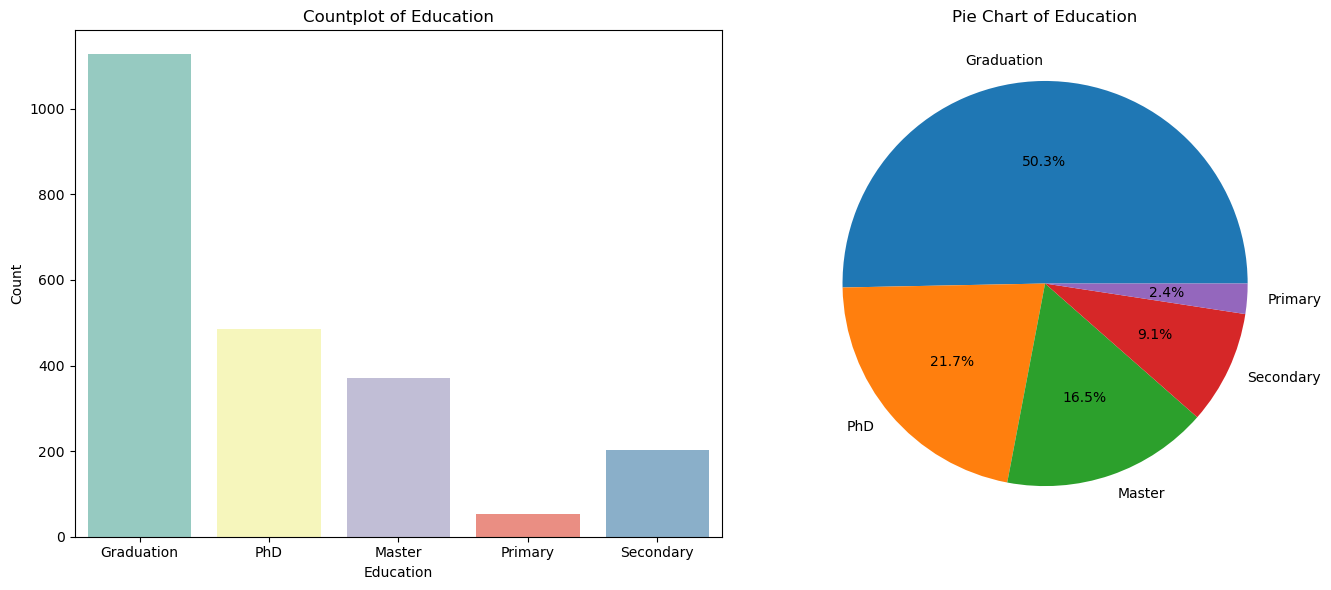

In [32]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Education", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Education')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Count')

# Create pie chart
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Education')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

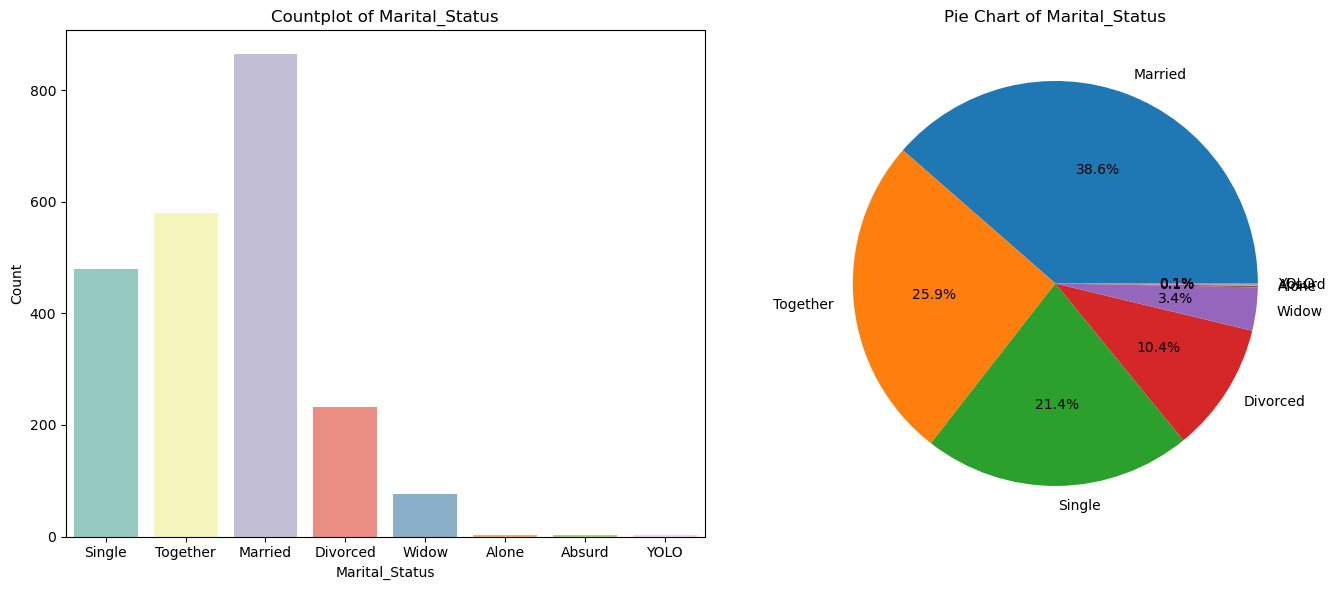

In [34]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Marital_Status", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Marital_Status')
axes[0].set_xlabel('Marital_Status')
axes[0].set_ylabel('Count')

# Create pie chart
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Marital_Status')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [37]:
# Replace values in the "Marital_Status" column with more meaningful categories
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Married", "Together":"Married", "Single":"Single", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single",})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


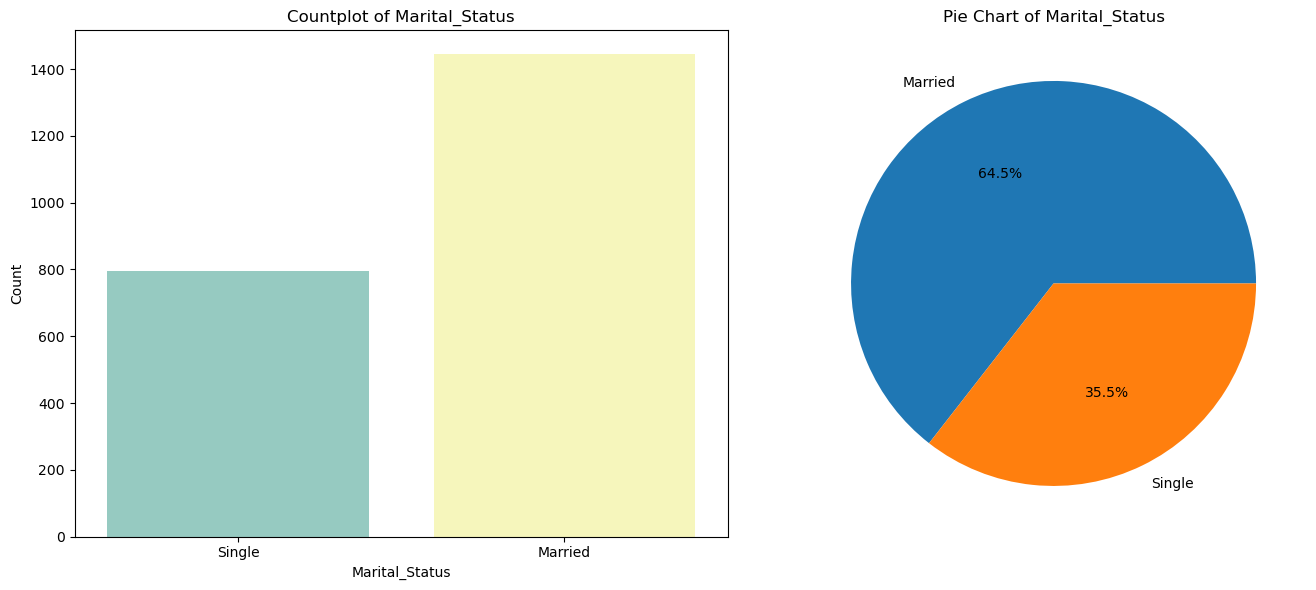

In [38]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Marital_Status", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Marital_Status')
axes[0].set_xlabel('Marital_Status')
axes[0].set_ylabel('Count')

# Create pie chart
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Marital_Status')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

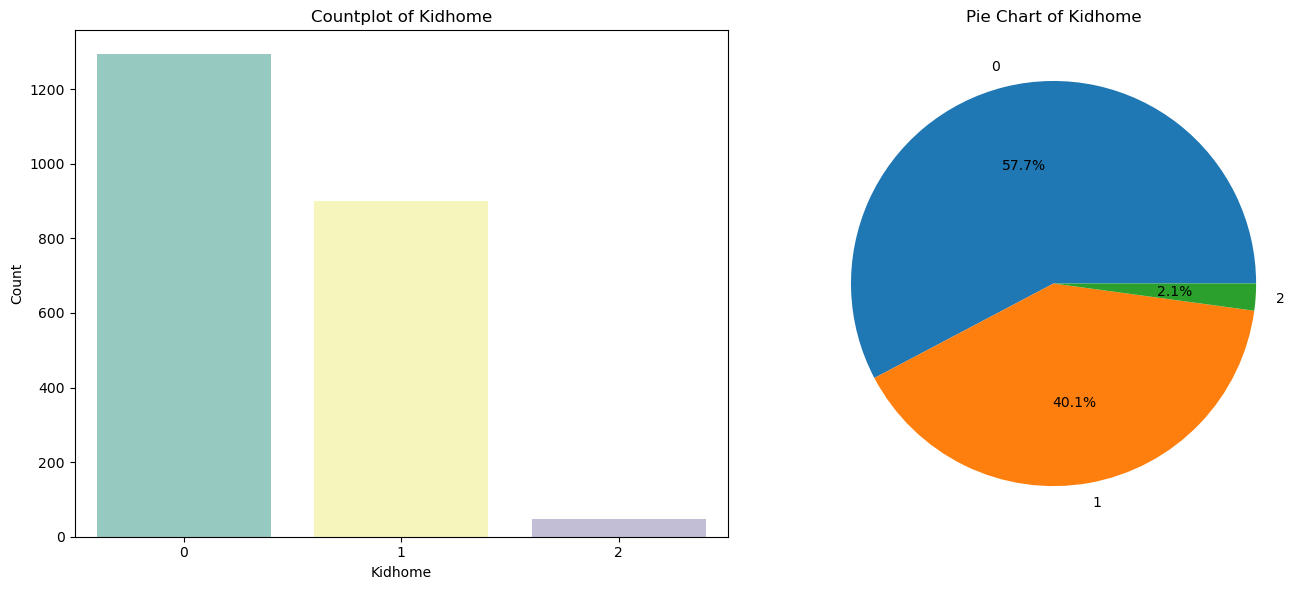

In [42]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Kidhome", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Kidhome')
axes[0].set_xlabel('Kidhome')
axes[0].set_ylabel('Count')

# Create pie chart
df['Kidhome'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Kidhome')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

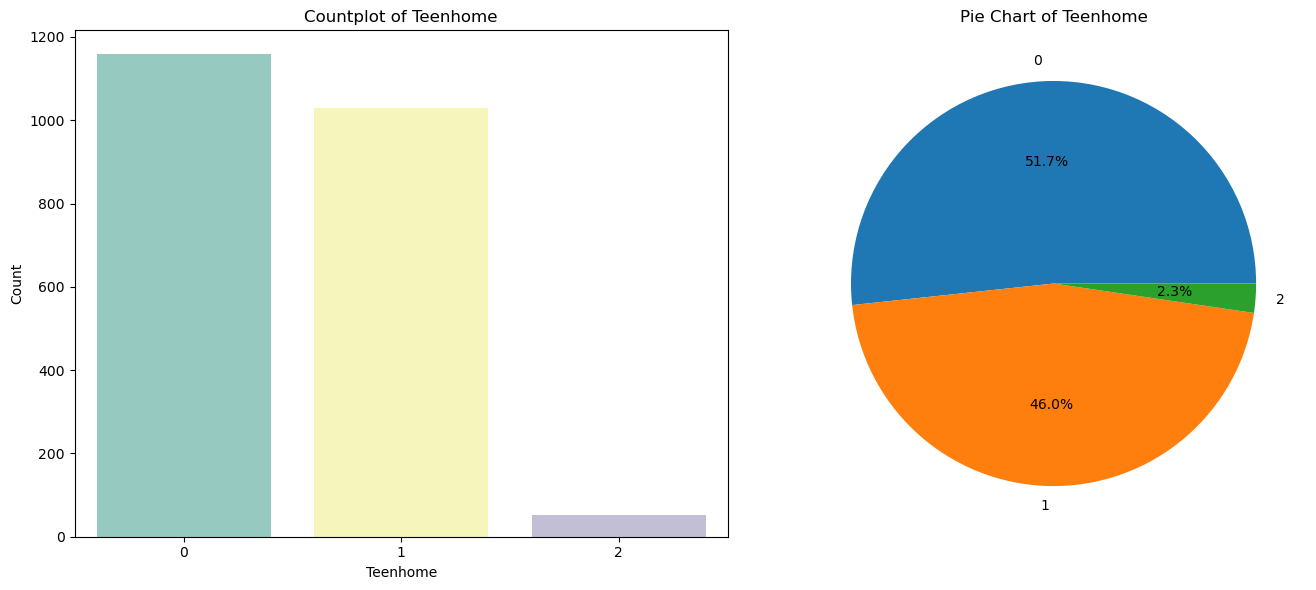

In [41]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Teenhome", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Teenhome')
axes[0].set_xlabel('Teenhome')
axes[0].set_ylabel('Count')

# Create pie chart
df['Teenhome'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Teenhome')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

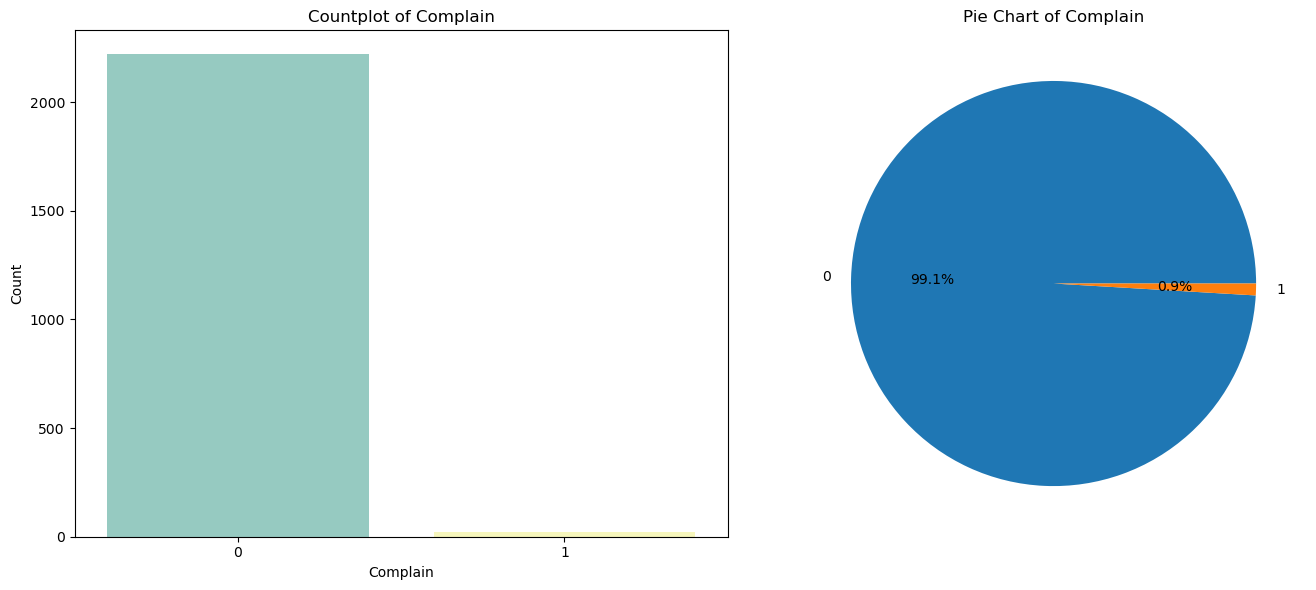

In [40]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Complain", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Complain')
axes[0].set_xlabel('Complain')
axes[0].set_ylabel('Count')

# Create pie chart
df['Complain'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Complain')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

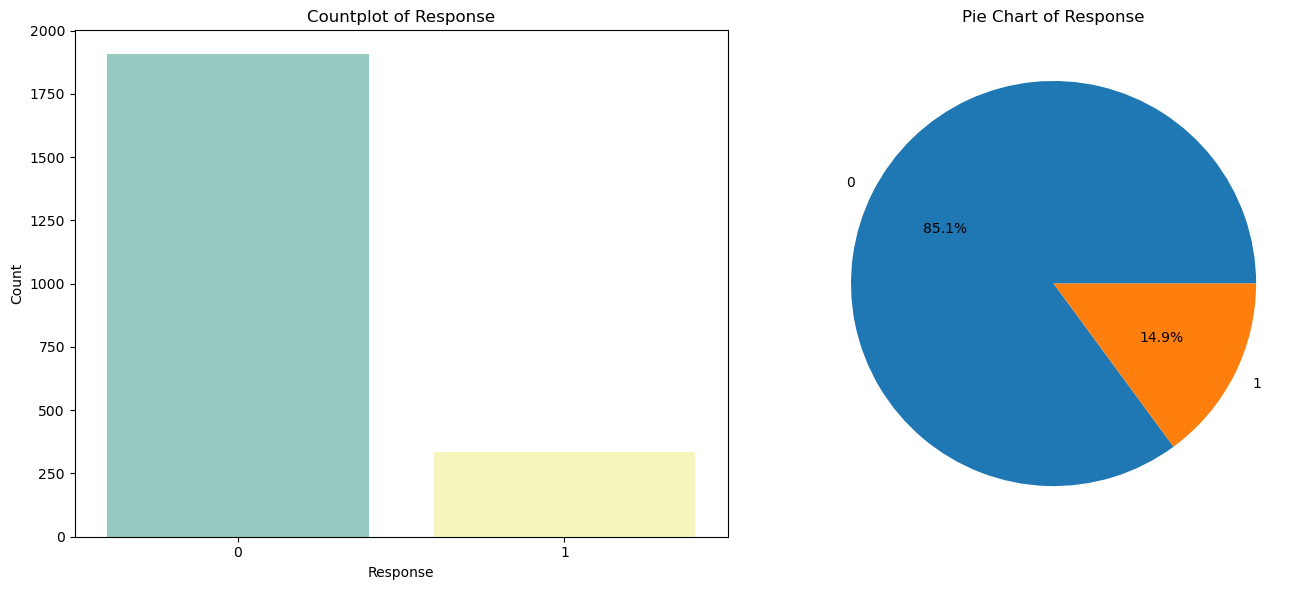

In [39]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create countplot
sns.countplot(x="Response", data=df, palette="Set3", ax=axes[0])
axes[0].grid(alpha=0.3)
axes[0].set_title('Countplot of Response')
axes[0].set_xlabel('Response')
axes[0].set_ylabel('Count')

# Create pie chart
df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Pie Chart of Response')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

- Absurd Relationships. The relationships with our four-legged friends, or family or everything. Ritu Raj. Love with my Pets · Ritu Raj. ·
- YOLO, which means 'You Only Live Once, Never Married: a person over the age of 15 that has never been married;

### Identifying Outliers
Identify and analyze outliers, especially in numerical variables.

Decide whether to keep or remove outliers based on domain knowledge and the context of the analysis.

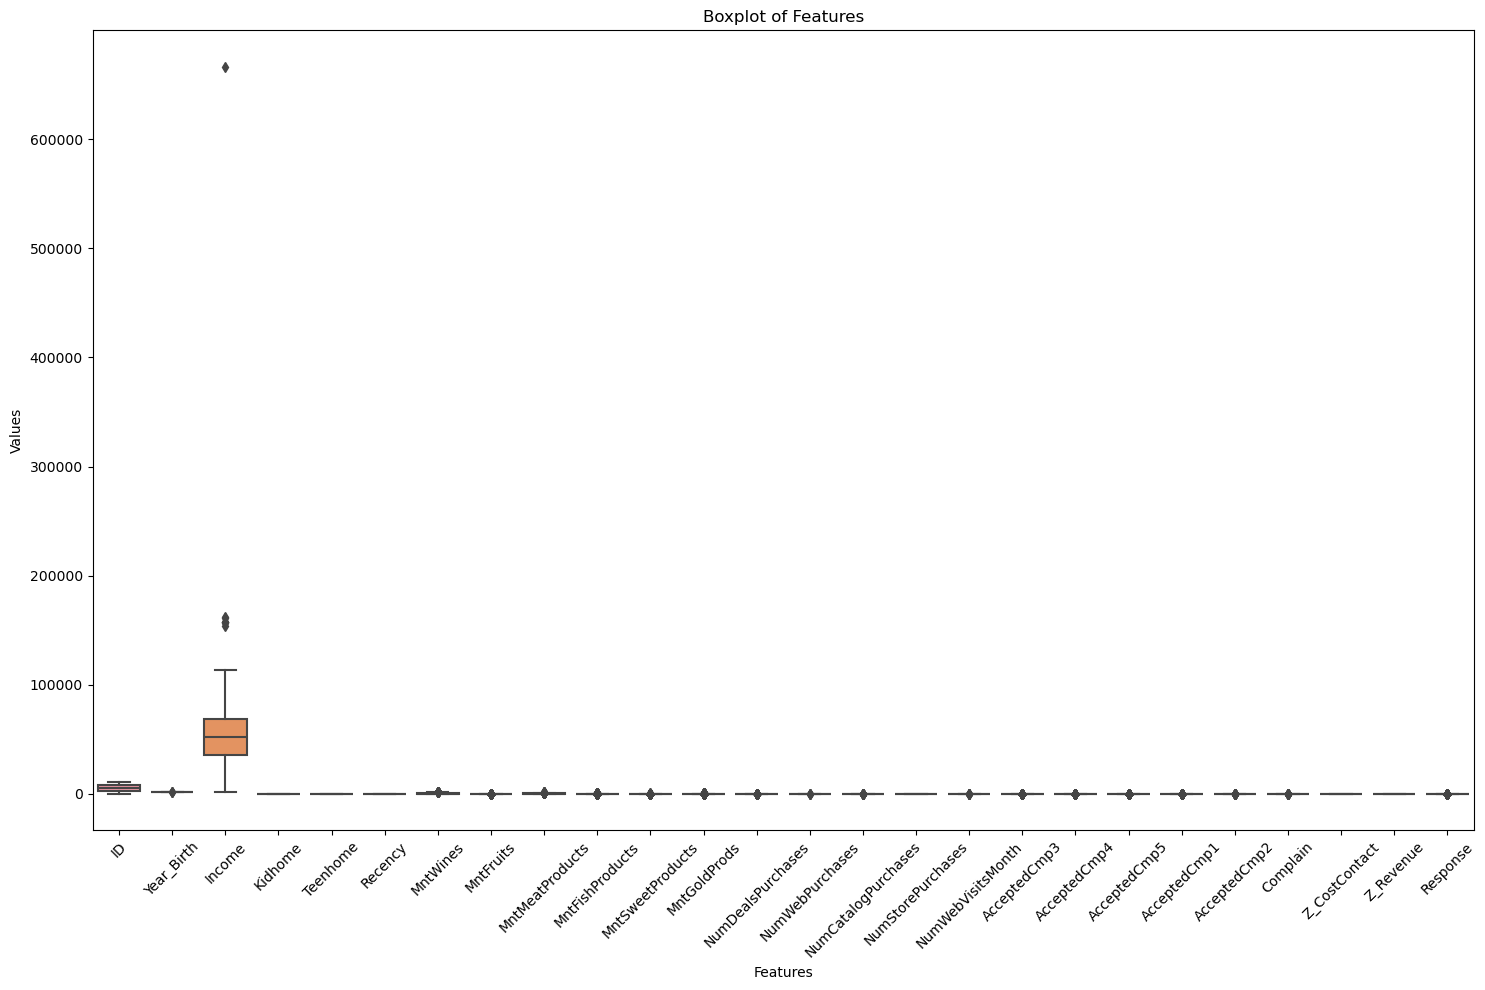

In [21]:
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [22]:
# Filter for continuous features 
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Print the count of continuous features
print('Continuous Feature Count:', len(continuous_features))

print('Continuous Features:', continuous_features)

Continuous Feature Count: 26
Continuous Features: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [49]:
outlier_detection = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']]

In [ ]:
# Define the number of subplots and figure size
num_plots = len(outlier_detection)
fig, axes = plt.subplots(num_plots, 1, figsize=(10,10), sharex=False, sharey=False)

# Plot boxplots for each continuous feature
for i, feature in enumerate(outlier_detection):
    sns.boxplot(x=feature, data=df, palette='crest', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')

plt.tight_layout(pad=2.0)
plt.show()

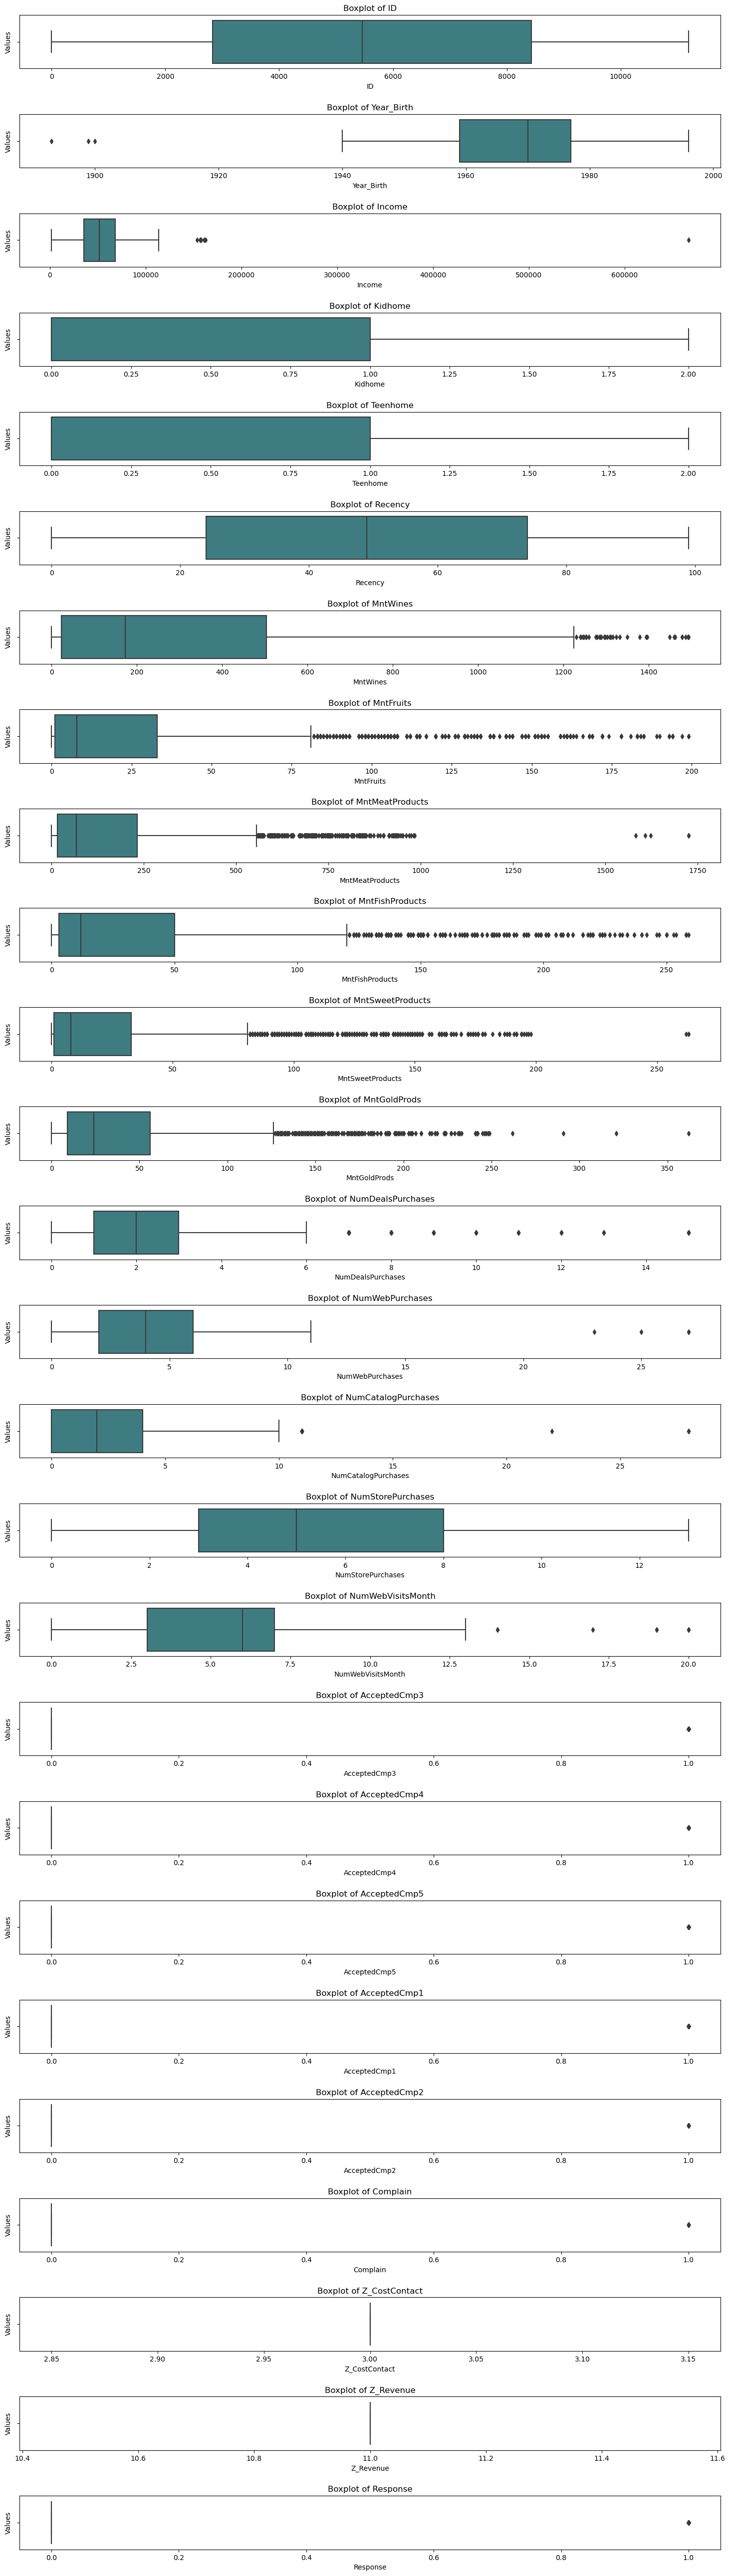

In [23]:
# Define the number of subplots and figure size
num_plots = len(continuous_features)
fig, axes = plt.subplots(num_plots, 1, figsize=(15, 2*num_plots), sharex=False, sharey=False)

# Plot boxplots for each continuous feature
for i, feature in enumerate(continuous_features):
    sns.boxplot(x=feature, data=df, palette='crest', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Values')

plt.tight_layout(pad=2.0)
plt.show()

In [45]:
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()
numerical_features

['ID',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

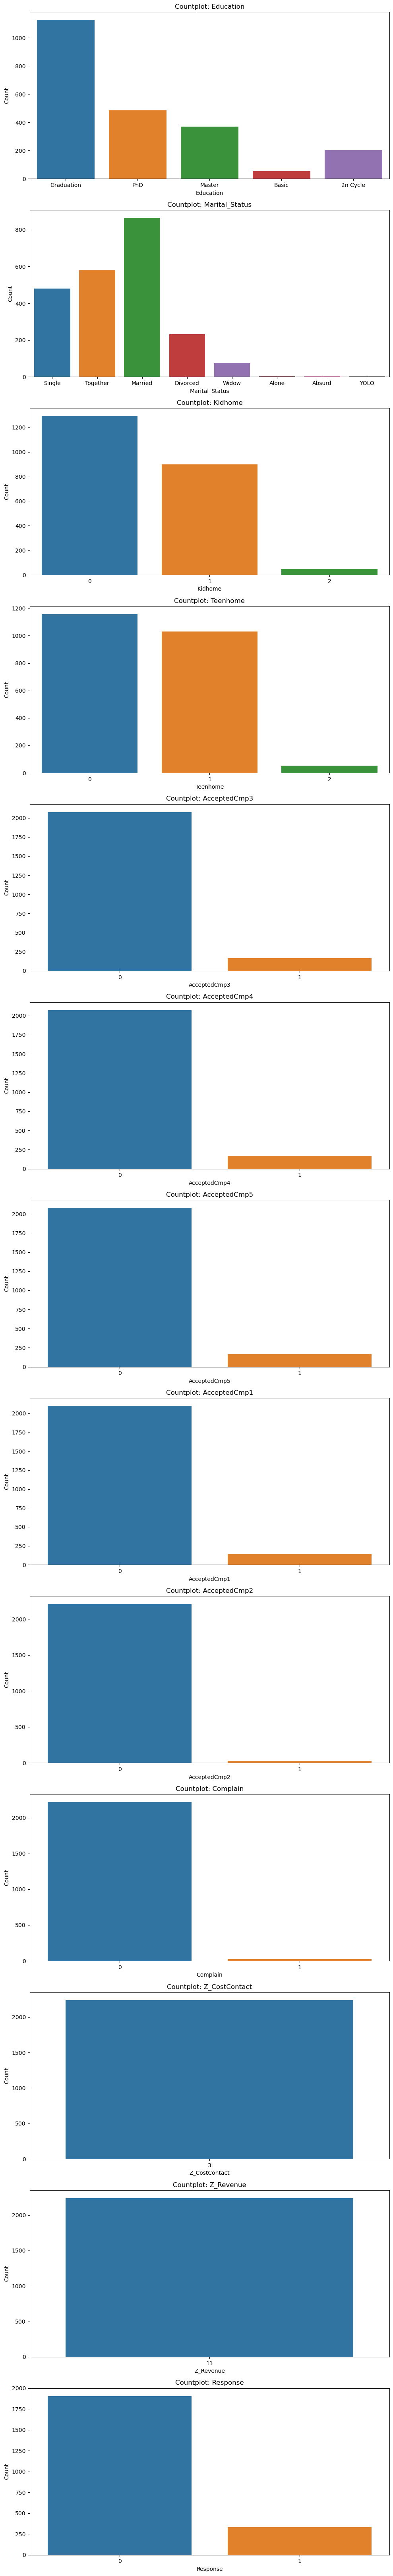

In [22]:
# Get features with unique values less than 10
features_less_than_10_unique_values = [feature for feature in df.columns if df[feature].nunique() < 10]

# Define the number of subplots and figure size
num_plots = len(features_less_than_10_unique_values)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))

# Plot countplots for each feature
for i, feature in enumerate(features_less_than_10_unique_values):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Countplot: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Univariate Analysis

Examine the distribution of each variable individually.
For numerical variables, analyze summary statistics like mean, median, min, max, and quartiles. Visualize them using histograms or boxplots.
For categorical variables (Education, Marital_Status, etc.), examine the frequency distribution using bar plots.

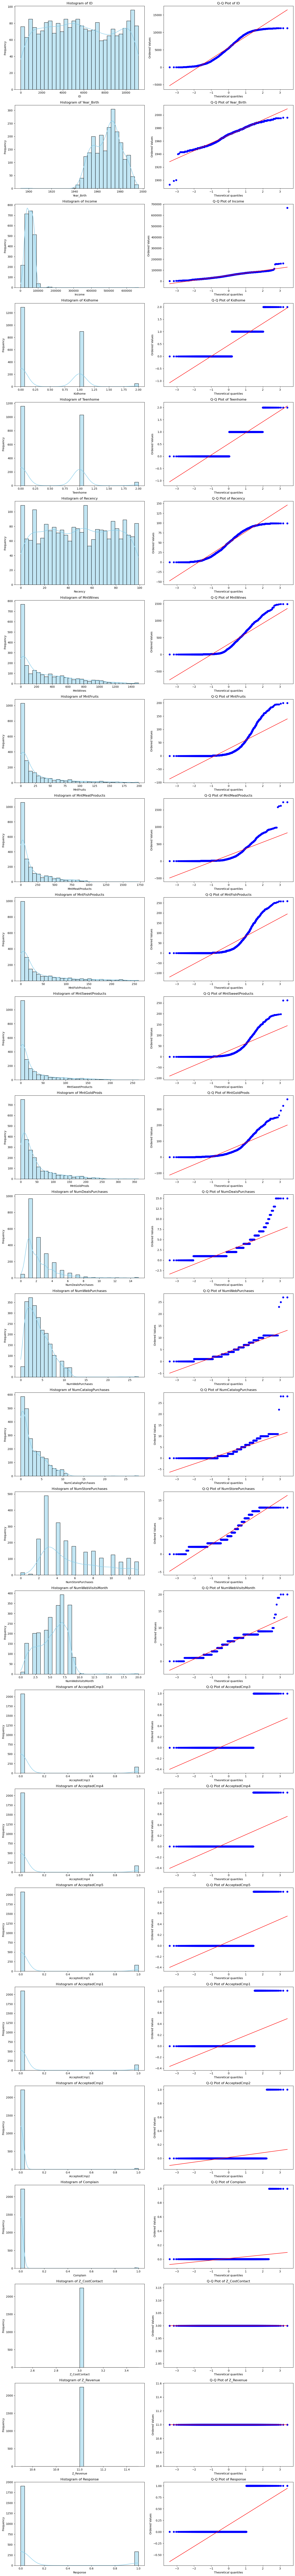

In [25]:
# Define the number of subplots and figure size
num_plots = len(continuous_features)
fig, axes = plt.subplots(num_plots, 2, figsize=(15, 5*num_plots), sharex=False, sharey=False)

# Plot histograms and kernel density plots for each continuous feature
for i, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i, 0], color='skyblue', bins=30)
    axes[i, 0].set_title(f'Histogram of {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Frequency')

    stats.probplot(df[feature], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {feature}')
    axes[i, 1].set_xlabel('Theoretical quantiles')
    axes[i, 1].set_ylabel('Ordered Values')

plt.tight_layout()
plt.show()

## Bivariate Analysis
Explore relationships between pairs of variables.

For numerical vs. numerical variables, we can use scatter plots to see if there's any correlation

For categorical vs. categorical variables, we can use contingency tables or stacked bar plots to observe the relationshi
.
For categorical vs. numerical variables, we can use boxplots or violin plots to see the distribution of the numerical variable across different categories.

KeyError: ''

## Temporal Analysis

## Segmentation
Explore whether there are natural segments within the data.
This can be done using clustering techniques or by segmenting based on categorical variables.

## Outlier Detection
Identify and analyze outliers, especially in numerical variables.

Decide whether to keep or remove outliers based on domain knowledge and the context of the analysis.

## Correlation Analysis

Compute correlation coefficients (e.g., Pearson, Spearman) to quantify the relationship between numerical variables.

Visualize correlations using a heatmap.

# Feature Engineering

Derive new features from existing ones if necessary.

In [24]:
#Age of customer as per the max value of Date of customer's enrollment with the company which is 2014.
df["Age"] = 2014 - df["Year_Birth"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


In [26]:
# Replace values in the "Marital_Status" column with more meaningful categories
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Married", "Together":"Married", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Single":"Single",})
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


In [27]:
# This represents the total count of children in the household by combining the counts of kids and teens.
df["Children"] = df["Kidhome"] + df["Teenhome"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1


In [29]:
# If Marital_Status is single, set family_members to 1, otherwise 2
df['Family_Members'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Single' else 2)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Members
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,1
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,0,2
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,2


In [30]:
# Add Children column to family_members
df['Family_Members'] += df['Children']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,Family_Members
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,2,3
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,0,2
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,1,3


In [ ]:
#Total spending on various items
df["Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df.head()

In [ ]:
# Calculate percentage of total expense compared to income
df['Expense_Percentage'] = (df['Spending'] / total_expense) * 100

In [ ]:
# Create a new column indicating in which campaign the offer was accepted by customer.
df['AcceptedCmpNo'] = df.apply(lambda row: 1 if row['AcceptedCmp1'] == 1
                                  else 2 if row['AcceptedCmp2'] == 1
                                  else 3 if row['AcceptedCmp3'] == 1
                                  else 4 if row['AcceptedCmp4'] == 1
                                  else 5 if row['AcceptedCmp5'] == 1
                                  else 0, axis=1)

df.head()

In [ ]:
# #For clarity
# data = data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [ ]:
# #Dropping some of the redundant features
# to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
# data = data.drop(to_drop, axis=1)

# Z_CostContact and Z_Revenue have constant values throughout, it is better to drop these variables
# marketing_data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

Bivariate

In [ ]:
# Visualise the Income and amount spent w.r.t marital status
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df, x='Marital_Status', y='Income', ax=ax[0])
sns.boxplot(data=df, x='Marital_Status', y='Amount_Spent', ax=ax[1])
ax[0].set_title("Income w.r.t Marital Status")
ax[1].set_title("Amount Spent w.r.t Marital Status")
fig.show()

In [ ]:
# Plot the income w.r.t education
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=marketing_data, x='Education', y='Income', order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax[0])
sns.barplot(data=marketing_data, x='Education', y='Amount_Spent', order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'], ax=ax[1])
ax[0].set_xlabel("Education")
ax[0].set_ylabel("Income")
ax[1].set_xlabel("Education")
ax[1].set_ylabel("Amount Spent")
plt.show()

- PhD, Master and Graduation level educated people are most earners and spenders. Hence, they can be targeted with higher end goods campaigns.

ValueError: Could not interpret input 'Family_Members'

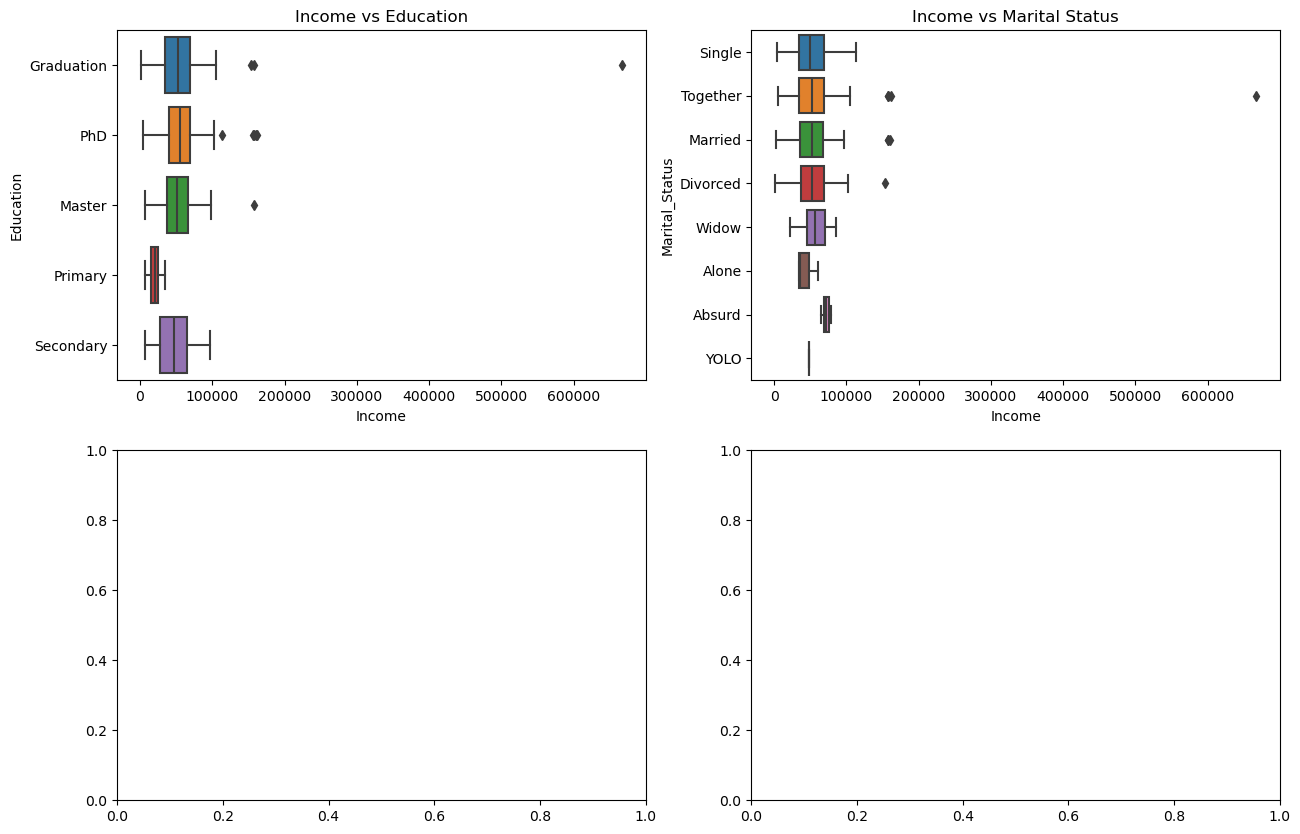

In [29]:
# Visualise the Income and amount spent w.r.t marital status
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=df, x='Income', y='Education', ax=axes[0, 0])
axes[0, 0].set_title('Income vs Education')

sns.boxplot(data=df, x='Income', y='Marital_Status', ax=axes[0, 1])
axes[0, 1].set_title('Income vs Marital Status')

sns.boxplot(data=df, x='Income', y='Family_Members', ax=axes[1, 0])
axes[1, 0].set_title('Income vs Family Members')

sns.boxplot(data=df, x='Income', y='Spending', ax=axes[1, 1])
axes[1, 1].set_title('Income vs Spending')

plt.tight_layout()
plt.show()

## Data Visualization

Utilize various visualization techniques like scatter plots, bar plots, pie charts, etc., to present your findings effectively.

# Summarize Key Findings

- Income column has 24 missing values